In [5]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,Dense,MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
print(X_train.shape)

(60000, 28, 28)


In [4]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [6]:
X_train = (X_train - 0.0) / (255.0 - 0.0)
X_test = (X_test - 0.0) / (255.0 - 0.0)
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

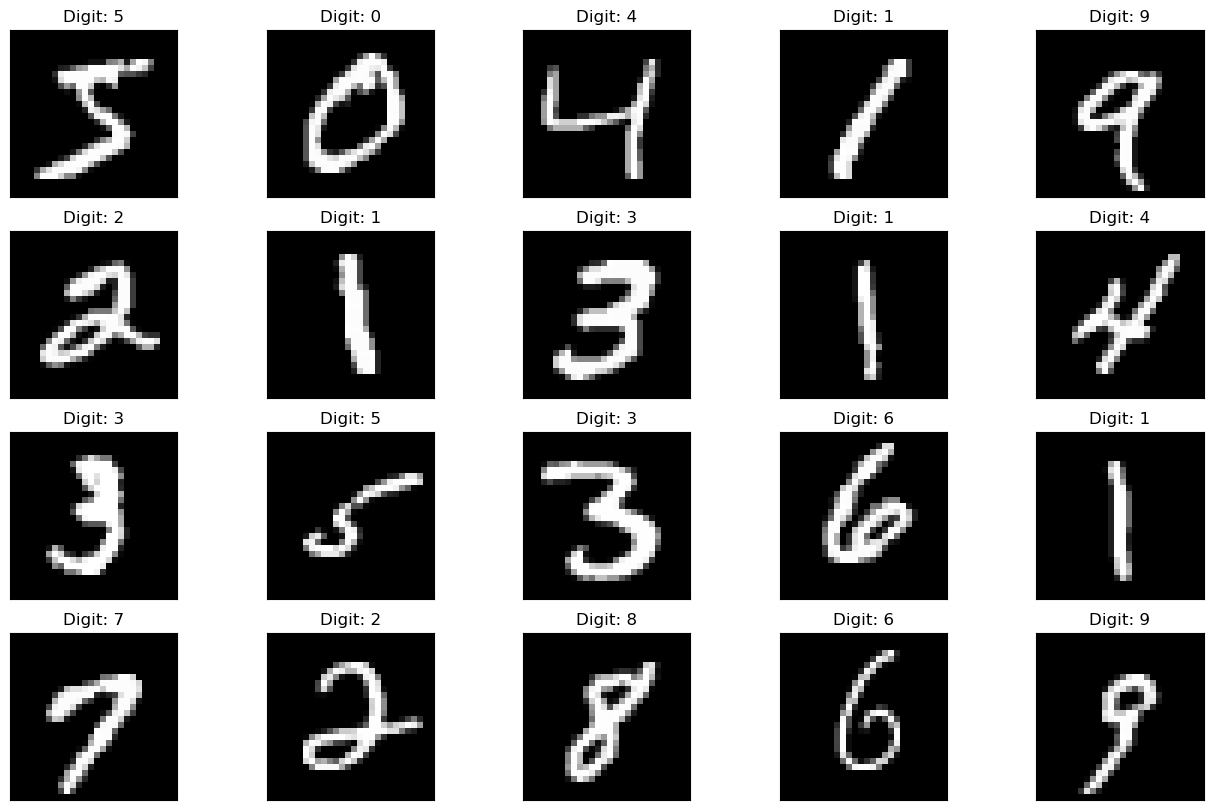

In [7]:
def plot_digit(image, digit, plt, i):
 plt.subplot(4, 5, i + 1)
 plt.imshow(image, cmap=plt.get_cmap('gray'))
 plt.title(f"Digit: {digit}")
 plt.xticks([])
 plt.yticks([])
plt.figure(figsize=(16, 10))
for i in range(20):
 plot_digit(X_train[i], y_train[i], plt, i) 
plt.show()

In [8]:
X_train = X_train.reshape((X_train.shape + (1,)))
X_test = X_test.reshape((X_test.shape + (1,)))
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [9]:
model = Sequential([
 Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
 MaxPooling2D((2, 2)),
 Flatten(),
 Dense(100, activation="relu"),
 Dense(10, activation="softmax")
])


C:\Users\komal\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
 optimizer=optimizer, 
 loss="sparse_categorical_crossentropy", 
 metrics=["accuracy"]
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         540,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 542,230 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=10) 

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8628 - loss: 0.4487 - val_accuracy: 0.9732 - val_loss: 0.0867
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9746 - loss: 0.0846 - val_accuracy: 0.9826 - val_loss: 0.0569
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9852 - loss: 0.0503 - val_accuracy: 0.9834 - val_loss: 0.0501
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9891 - loss: 0.0365 - val_accuracy: 0.9856 - val_loss: 0.0414
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9922 - loss: 0.0249 - val_accuracy: 0.9832 - val_loss: 0.0509
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9951 - loss: 0.0171 - val_accuracy: 0.9874 - val_loss: 0.0403
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9960 - loss: 0.0139 - val_accuracy: 0.9879 - val_loss: 0.0393
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9974 - loss: 0.0094 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


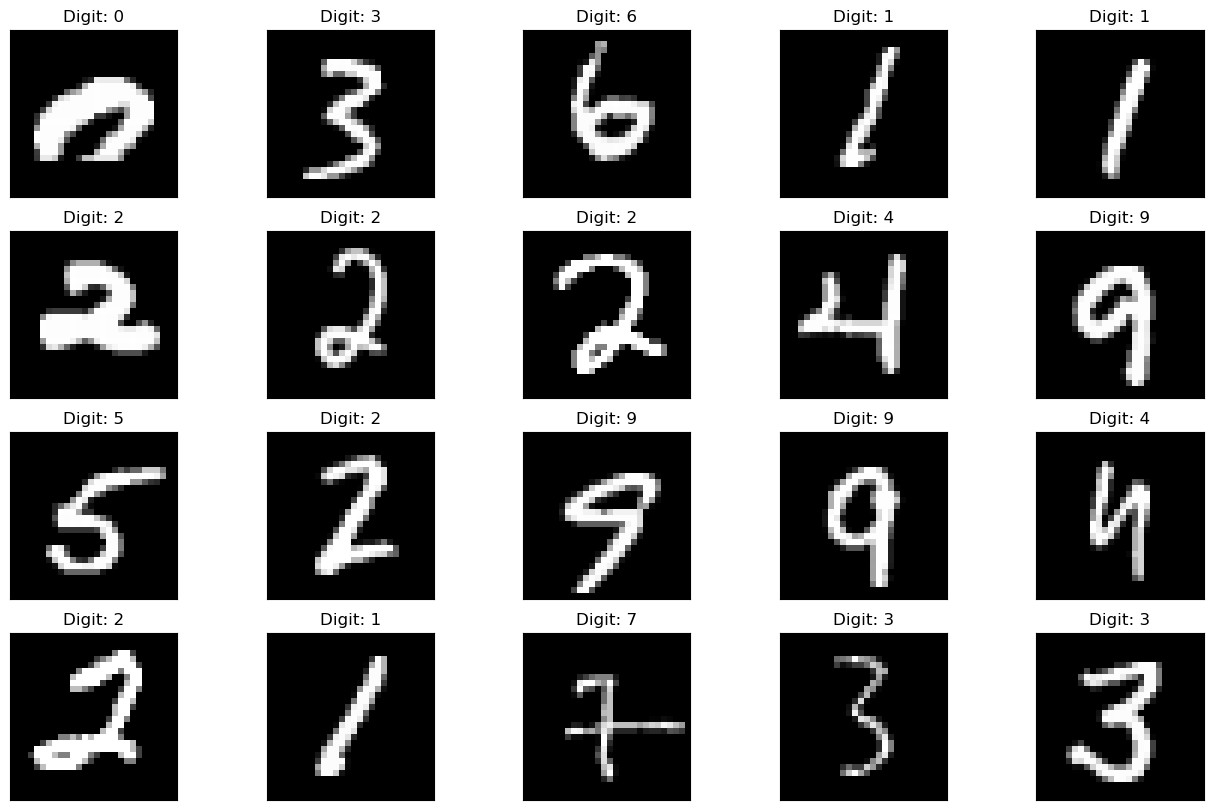

In [15]:
plt.figure(figsize=(16, 10))
for i in range(20):
 image = random.choice(X_test).squeeze()
 digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
 plot_digit(image, digit, plt, i)
plt.show()

In [16]:
predictions = np.argmax(model.predict(X_test), axis=-1)
accuracy_score(y_test, predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.9872

In [17]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])    #Test Loss
print('Test accuracy:', score[1])    #Test Accuracy

Test loss: 0.04198716580867767
Test accuracy: 0.9872000217437744


In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = 10
epochs_range = range(epochs)

<Figure size 640x480 with 0 Axes>

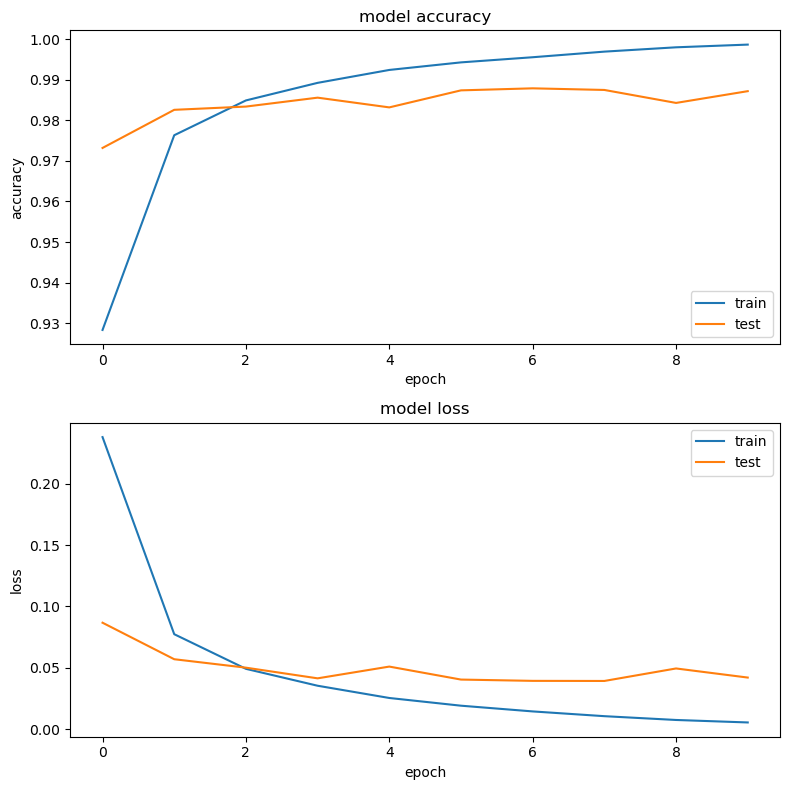

In [19]:
import os
# plotting the metrics
fig = plt.figure()
plt.figure(figsize=(8, 8))

plt.subplot(2,1,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')


plt.subplot(2,1,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

In [25]:
#Save the model
# serialize model to JSON
model_digit_json = model.to_json()
with open("model_digit.json", "w") as json_file:
    json_file.write(model_digit_json)
# serialize weights to HDF5
model.save_weights("model_digit.weights.h5")
print("Saved model to disk")


Saved model to disk
